### Example #1

Author : Minjun J. Choi (mjchoi@nfri.re.kr)

We will calculate cross power and coherence between two data sets.

#### Step #0
Import modules.

In [2]:
%matplotlib inline 
from fluctana import *

#### Step #1 
Make two data sets to be compared.

One data set has only one channel ('MC1T06').

The other has two channels ('MC1T07', 'MC1T08').

In [3]:
A = FluctAna()
A.add_data(KstarMds(), shot=18597, trange=[1.82, 1.83], clist=['MC1T06'], norm=0, res=0.000002)
A.add_data(KstarMds(), shot=18597, trange=[1.82, 1.83], clist=['MC1T07', 'MC1T08'], norm=0, res=0.000002)

data is not normalized
Read resample(\MC1T06, 1.820000, 1.830000, 0.000002) (number of data points = 5001)
data is not normalized
Read resample(\MC1T07, 1.820000, 1.830000, 0.000002) (number of data points = 5001)
Read resample(\MC1T08, 1.820000, 1.830000, 0.000002) (number of data points = 5001)


#### Step #2
Do fft transform with proper option parameters.

In [4]:
A.fftbins(nfft=516,window='hann',overlap=0.5,detrend=0)

---- DATA SET # 0 for [1.82, 1.83] s ----
{000:MC1T06} 
---- DATA SET # 1 for [1.82, 1.83] s ----
{000:MC1T07} {001:MC1T08} 
dnum 0 fftbins 17 with hann size 516 overlap 0.5 detrend 0
dnum 1 fftbins 17 with hann size 516 overlap 0.5 detrend 0


The message means that

data set number 0 has one channel and its data is divided into 75 sections (or bins) with overlap ratio = 0.5. Each section (bin) has 516 data points.

data set number 1 has two channels and each data is divided into 75 sections (or bins) with overlap ratio = 0.5. Each section (bin) has 516 data points.

#### Step #3
Calculate cross power between two data sets.

Set the reference data set (done) as data set number 0. If the reference data set has only one channel, calculations will be done between the one reference channel and all channels in dtwo. Otherwise, done can have same number of channels with dtwo, and calculations between pairs of same channel numbers will be done.

Set dtwo as data set number 1.

In [5]:
A.cross_power(done=0,dtwo=1)

#### Step #4
Plot the calculation result with type='val'. 

The result is saved for data set number 1 (dtwo).

Plot the result of the channel number 0, 1 (in dtwo=1) in multiple windows.

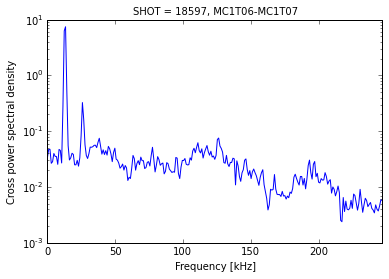

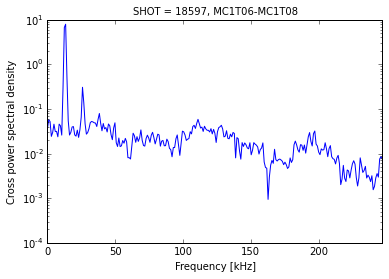

In [6]:
A.mplot(dnum=1,cnum=[0,1],type='val')

Plot the result of the channel number 0, 1 (in dtwo=1) in single window (overlapping)

dnum 1 : calculation MC1T06-MC1T07 is plotted
dnum 1 : calculation MC1T06-MC1T08 is plotted


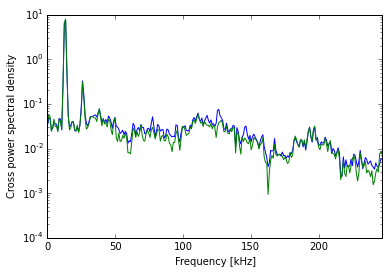

In [7]:
A.oplot(dnum=1,cnum=[0,1],type='val')

Plot the rms amplitude image (2 points in this example) by integrating the cross power spectral density over a frequency range

snum : sample channel number

frange : integration frequency range

vlimits : color scale limits

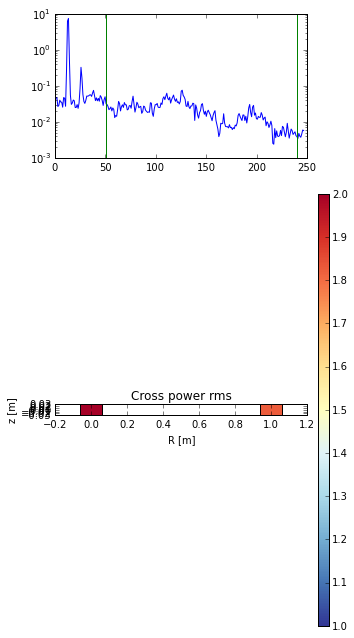

In [13]:
A.cplot(dnum=1,snum=0,frange=[50,240],vlimits=[1,2])

You can check calculation values as follows.

In [14]:
print A.Dlist[1].pdata # in channel number ordering

[ 2.03376101  1.82767899]


You can calculate and plot coherence similarily.

In [15]:
A.coherence(done=0,dtwo=1)

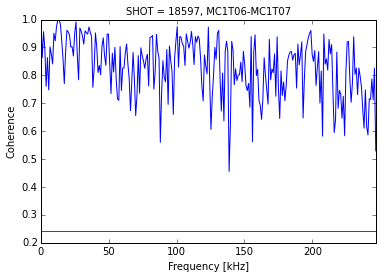

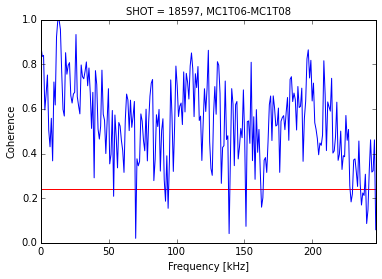

In [16]:
A.mplot(dnum=1,cnum=[0,1],type='val')

dnum 1 : calculation MC1T06-MC1T07 is plotted
dnum 1 : calculation MC1T06-MC1T08 is plotted


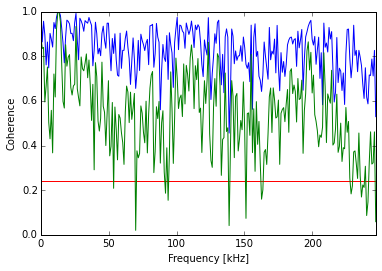

In [17]:
A.oplot(dnum=1,cnum=[0,1],type='val')

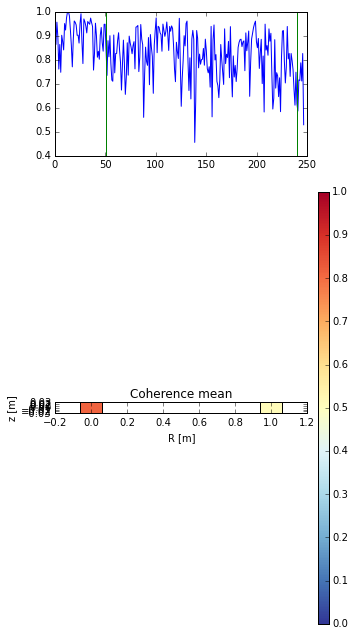

In [19]:
A.cplot(dnum=1,snum=0,frange=[50,240],vlimits=[0,1])

In [20]:
print A.Dlist[1].pdata

[ 0.81605954  0.51301536]
